In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("atrEuropa.csv",index_col="Last Name:")

# For this, we'll only keep Keratoconus or normal patients.

In [3]:
df

,Tipo,Age,IOP,DefoAmpl-Max,DeflLeng-Max,DeflArea-Max,DefoAmpl-AUC,DeflLeng-AUC,DeflArea-AUC,CornVelo-AUC,...,Max InverseRadius [mm^-1],DA Ratio Max (2mm),PachySlope [µm],DA Ratio Max (1mm),ARTh,bIOP,Integrated Radius [mm^-1],SP A1,CBI,TBI
Last Name:,,,,,,,,,,,,,,,,,,,,,
888b1b6c40,Ceratocone,29.000000,12.000000,1.136000,7.182000,3.996000,60.959083,394.833000,178.090333,9.580750,...,0.165,5.01591,48.22704,1.60802,347.42805,13.8,8.538,62.777,0.987,1.000
ad841a83d0,Ceratocone,27.000000,11.500000,1.191000,7.182000,4.074000,70.849417,388.129000,181.882333,9.788167,...,0.191,4.93730,28.72816,1.64728,524.82788,12.6,10.053,74.299,0.022,1.000
92f8e531ca,Ceratocone,28.000000,13.500000,1.207000,7.401000,4.495000,60.450000,367.842000,181.030000,10.167583,...,0.183,4.68514,75.14560,1.61234,205.57647,15.5,9.606,87.930,0.989,1.000
98c72a3c3a,Ceratocone,28.000000,14.500000,1.142000,6.980000,4.087000,57.883083,500.060500,161.398750,9.480000,...,0.172,3.94538,59.89279,1.50617,293.96190,15.8,8.596,96.602,0.368,1.000
a6afcfb47e,Ceratocone,35.000000,11.500000,1.005000,6.037000,3.049000,51.769000,330.780000,129.525417,8.493000,...,0.204,5.37244,89.22812,1.74682,159.14452,12.8,10.461,80.404,1.000,1.000
9d4db7a844,Ceratocone,56.000000,15.500000,1.066000,6.555000,3.805000,56.176583,337.848000,150.248000,8.951167,...,0.181,4.87697,42.41404,1.62721,645.79356,14.5,7.870,96.025,0.001,1.000
a3fd494bd5,Ceratocone,42.000000,12.500000,1.171000,7.114000,4.109000,66.252750,508.911000,175.542167,9.804667,...,0.180,5.01677,41.65730,1.63266,481.57343,13.7,9.305,77.647,0.303,1.000
1b93865908,Ceratocone,33.000000,13.500000,1.078000,6.091000,3.369000,62.994333,326.701000,143.464083,8.725333,...,0.206,5.38499,69.90924,1.69977,174.74424,15.3,9.015,70.053,1.000,1.000
4f506d9459,Ceratocone,45.000000,14.309973,1.270000,6.413000,3.983000,74.502167,373.185000,188.738000,10.663667,...,0.230,6.91374,64.47058,1.78495,170.96430,NaN,12.801,NaN,NaN,NaN


In [4]:
df.fillna(value=0,inplace=True)

# Removing static measures

In [5]:
df = df.drop(columns=["ARTh","SP A1"])

In [6]:
df = df[(df["Tipo"]=="Ceratocone")|(df["Tipo"]=="Normal")]
df["Tipo"] = df["Tipo"].apply(lambda x:1 if x=="Ceratocone" else 0)

In [7]:
seletores = ["Error","QS.1","Error IOP","QS IOP","Error Pachy","QS Pachy"]
dfSelect = df[seletores]
df = df.drop(columns=seletores)

# TBI e CBI são vetores resposta de outros algoritmos preditivos, que usaremos como objetivos de igualar ou ultrapassar.

In [8]:
Outros = ["TBI","CBI"]
medidas = df[Outros]

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,roc_auc_score,recall_score

In [10]:
soloMetrics = accuracy_score,precision_score,roc_auc_score,recall_score
names = ["Accuracy","Precision","Roc_AUC","Recall"]

In [11]:
def scoreIt(predicted,real,intercept,metrics,metricNames,name):
    mam = []
    for metr in soloMetrics:
        mam.append(metr(predicted.apply(lambda x:1 if x>intercept else 0),real))
    return pd.DataFrame(mam,index=metricNames,columns = [name])

In [12]:
TBI = scoreIt(medidas["TBI"],df["Tipo"],0.5,soloMetrics,names,"TBI")
CBI = scoreIt(medidas["CBI"],df["Tipo"],0.5,soloMetrics,names,"CBI")
Old = pd.concat([TBI,CBI],axis=1)

In [13]:
Old

,TBI,CBI
Accuracy,0.986441,0.932203
Precision,0.974026,0.850649
Roc_AUC,0.982426,0.916549
Recall,0.974026,0.885135


In [14]:
df = df.drop(columns=Outros)

In [15]:
df.head()

,Tipo,Age,IOP,DefoAmpl-Max,DeflLeng-Max,DeflArea-Max,DefoAmpl-AUC,DeflLeng-AUC,DeflArea-AUC,CornVelo-AUC,...,A1 dArc Length [mm],HC dArc Length [mm],A2 dArc Length [mm],dArcLengthMax [mm],Max InverseRadius [mm^-1],DA Ratio Max (2mm),PachySlope [µm],DA Ratio Max (1mm),bIOP,Integrated Radius [mm^-1]
Last Name:,,,,,,,,,,,,,,,,,,,,,
888b1b6c40,1,29.0,12.0,1.136,7.182,3.996,60.959083,394.8330,178.090333,9.580750,...,-0.017,-0.163,-0.028,-0.176,0.165,5.01591,48.22704,1.60802,13.8,8.538
ad841a83d0,1,27.0,11.5,1.191,7.182,4.074,70.849417,388.1290,181.882333,9.788167,...,-0.017,-0.133,-0.013,-0.155,0.191,4.93730,28.72816,1.64728,12.6,10.053
92f8e531ca,1,28.0,13.5,1.207,7.401,4.495,60.450000,367.8420,181.030000,10.167583,...,-0.015,-0.149,-0.017,-0.149,0.183,4.68514,75.14560,1.61234,15.5,9.606
98c72a3c3a,1,28.0,14.5,1.142,6.980,4.087,57.883083,500.0605,161.398750,9.480000,...,-0.014,-0.124,-0.019,-0.134,0.172,3.94538,59.89279,1.50617,15.8,8.596
a6afcfb47e,1,35.0,11.5,1.005,6.037,3.049,51.769000,330.7800,129.525417,8.493000,...,-0.012,-0.112,-0.016,-0.114,0.204,5.37244,89.22812,1.74682,12.8,10.461


In [16]:
pedro = df[df.columns[:18]]

In [17]:
exams = df[df.columns[19:]]
exams["Tipo"] = df["Tipo"]
exams

/home/wykthor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,A1 Time [ms],A1 Velocity [m/s],A2 Time [ms],A2 Velocity [m/s],HC Time [ms],A1 Deformation Amp. [mm],HC Deformation Amp. [mm],A2 Deformation Amp. [mm],A1 Deflection Length [mm],HC Deflection Length [mm],...,HC dArc Length [mm],A2 dArc Length [mm],dArcLengthMax [mm],Max InverseRadius [mm^-1],DA Ratio Max (2mm),PachySlope [µm],DA Ratio Max (1mm),bIOP,Integrated Radius [mm^-1],Tipo
Last Name:,,,,,,,,,,,,,,,,,,,,,
888b1b6c40,6.735,0.165,21.905,-0.339,16.170,0.123,1.136,0.322,2.285,7.070,...,-0.163,-0.028,-0.176,0.165,5.01591,48.22704,1.60802,13.8,8.538,1
ad841a83d0,6.683,0.172,22.220,-0.290,16.401,0.126,1.191,0.404,2.281,6.888,...,-0.133,-0.013,-0.155,0.191,4.93730,28.72816,1.64728,12.6,10.053,1
92f8e531ca,7.098,0.158,21.596,-0.296,14.322,0.116,1.207,0.263,2.016,7.401,...,-0.149,-0.017,-0.149,0.183,4.68514,75.14560,1.61234,15.5,9.606,1
98c72a3c3a,7.178,0.155,21.495,-0.251,15.015,0.121,1.142,0.279,2.119,6.924,...,-0.124,-0.019,-0.134,0.172,3.94538,59.89279,1.50617,15.8,8.596,1
a6afcfb47e,6.946,0.146,22.082,-0.249,15.939,0.109,1.005,0.259,2.142,5.937,...,-0.112,-0.016,-0.114,0.204,5.37244,89.22812,1.74682,12.8,10.461,1
9d4db7a844,7.209,0.150,21.075,-0.324,15.477,0.148,1.066,0.355,2.409,6.511,...,-0.198,-0.039,-0.204,0.181,4.87697,42.41404,1.62721,14.5,7.870,1
a3fd494bd5,6.809,0.168,21.870,-0.304,17.094,0.128,1.171,0.390,2.259,6.776,...,-0.135,-0.016,-0.178,0.180,5.01677,41.65730,1.63266,13.7,9.305,1
1b93865908,7.213,0.171,21.713,-0.301,15.708,0.145,1.078,0.407,2.262,6.062,...,-0.135,-0.022,-0.143,0.206,5.38499,69.90924,1.69977,15.3,9.015,1
4f506d9459,6.628,0.205,22.452,-0.364,17.094,0.131,1.270,0.413,2.298,6.300,...,-0.111,-0.016,-0.119,0.230,6.91374,64.47058,1.78495,0.0,12.801,1


In [18]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import sklearn

# Analyzing Pedro's base

In [19]:
pedro.head()

,Tipo,Age,IOP,DefoAmpl-Max,DeflLeng-Max,DeflArea-Max,DefoAmpl-AUC,DeflLeng-AUC,DeflArea-AUC,CornVelo-AUC,InveRadi-AUC,CornVeloFirstPeak,CornVeloSecondPeak,CornVeloPeakAngle,CornVeloMinSquareDist,ApplLengFirstPeak,ApplLengSecondPeak,ApplLengPeakDistance
Last Name:,,,,,,,,,,,,,,,,,,
888b1b6c40,1,29.0,12.0,1.136,7.182,3.996,60.959083,394.8330,178.090333,9.580750,8.562,0.254,-0.396,-0.010656,-0.007136,2.710,1.826,66.0
ad841a83d0,1,27.0,11.5,1.191,7.182,4.074,70.849417,388.1290,181.882333,9.788167,10.078,0.279,-0.359,-0.010127,-0.007011,2.282,1.596,67.0
92f8e531ca,1,28.0,13.5,1.207,7.401,4.495,60.450000,367.8420,181.030000,10.167583,9.616,0.269,-0.383,-0.011241,-0.008908,2.243,2.660,62.0
98c72a3c3a,1,28.0,14.5,1.142,6.980,4.087,57.883083,500.0605,161.398750,9.480000,8.617,0.228,-0.299,-0.008932,-0.008370,2.115,1.805,62.0
a6afcfb47e,1,35.0,11.5,1.005,6.037,3.049,51.769000,330.7800,129.525417,8.493000,10.494,0.203,-0.271,-0.007645,-0.006393,2.298,1.470,66.0


In [20]:
metrics = ["accuracy","f1","precision","recall","roc_auc"]
results = ['test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'test_roc_auc']

In [21]:
models = [SVC(),LogisticRegression(),DecisionTreeClassifier()]

In [22]:
def tryIt(dataframe,models,metrics,results):
    res = []
    names = []
    for model in models:
        result = []
        score = cross_validate(model,dataframe.drop(columns="Tipo"),dataframe["Tipo"],return_train_score=False,cv=10,scoring=metrics)
        for k in results:
            result.append([k,np.median(score[k])])
        names.append(str(model.__class__).split(".")[-1].split("'")[0])
        res.append(result)
    return np.array(res),names

In [23]:
def showResults(res,names):
    return pd.concat((pd.DataFrame(res[k,:,1:],index=res[0,:,0],columns=[names[k]+"-Median"]) for k in range(len(res))),axis=1).T

In [24]:
res,names = tryIt(exams,models,metrics,results)

In [25]:
showResults(res,names)

,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
SVC-Median,0.9060490940970194,0.7928571428571428,0.8916666666666666,0.6770833333333333,0.9070031712473574
LogisticRegression-Median,0.9137931034482759,0.8275862068965518,0.9226190476190477,0.8,0.9474949348132488
DecisionTreeClassifier-Median,0.8390804597701149,0.6683569979716024,0.6842105263157895,0.6770833333333333,0.775513125440451


# Multi-layer perceptron
- We should scale the values from 0.1 to 0.9, literature says so.

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
data = exams
scaler = MinMaxScaler()
scaler.fit(data)
ScaledData = pd.DataFrame(scaler.transform(data),columns=data.columns,index=data.index)


In [28]:
models.append(MLPClassifier(max_iter=300))

In [29]:
exams.columns

Index(['A1 Time [ms]', 'A1 Velocity [m/s]', 'A2 Time [ms]',
       'A2 Velocity [m/s]', 'HC Time [ms]', 'A1 Deformation Amp. [mm]',
       'HC Deformation Amp. [mm]', 'A2 Deformation Amp. [mm]',
       'A1 Deflection Length [mm]', 'HC Deflection Length [mm]',
       'A2 Deflection Length [mm]', 'A1 Deflection Amp. [mm]',
       'HC Deflection Amp. [mm]', 'A2 Deflection Amp. [mm]',
       'Deflection Amp. Max [mm]', 'Deflection Amp. Max [ms]',
       'Whole Eye Movement Max [mm]', 'Whole Eye Movement Max [ms]',
       'A1 Deflection Area [mm²]', 'HC Deflection Area [mm²]',
       'A2 Deflection Area [mm²]', 'A1 dArc Length [mm]',
       'HC dArc Length [mm]', 'A2 dArc Length [mm]', 'dArcLengthMax [mm]',
       'Max InverseRadius [mm^-1]', 'DA Ratio Max (2mm)', 'PachySlope [µm]',
       'DA Ratio Max (1mm)', 'bIOP', 'Integrated Radius [mm^-1]', 'Tipo'],
      dtype='object')

In [30]:
res,names = tryIt(ScaledData,models,metrics,results)

In [31]:
showResults(res,names)

,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
SVC-Median,0.8375219170075978,0.5357142857142858,1.0,0.3666666666666667,0.9256518675123326
LogisticRegression-Median,0.8991525423728814,0.7596153846153846,1.0,0.6458333333333333,0.921875
DecisionTreeClassifier-Median,0.8390804597701149,0.7159498207885304,0.6966911764705883,0.75,0.8147749295278366
MLPClassifier-Median,0.9145236703682058,0.8212005108556832,0.9583333333333333,0.7333333333333333,0.9255990133897111


# Coeficientes da regressão logística

In [32]:
LR = LogisticRegression().fit(exams.drop(columns="Tipo"),exams["Tipo"])
pd.DataFrame(LR.coef_,columns=exams.drop(columns="Tipo").columns).T.sort_values(by=0,ascending=False)

,0
DA Ratio Max (2mm),1.930430
A1 Deflection Length [mm],1.081998
A2 Deflection Area [mm²],0.727330
Integrated Radius [mm^-1],0.716039
Whole Eye Movement Max [ms],0.619480
A2 Deflection Amp. [mm],0.249341
bIOP,0.208791
A2 Deflection Length [mm],0.160226
A1 Deformation Amp. [mm],0.112020
A1 Deflection Amp. [mm],0.109971


# Qual a importância dada aos atributos pela árvore de decisão?

In [33]:
tree = DecisionTreeClassifier().fit(exams.drop(columns="Tipo"),exams["Tipo"])
importance = pd.DataFrame(tree.feature_importances_,index=exams.drop(columns="Tipo").columns,columns=["Importance"])
importance.sort_values(by="Importance",ascending=False)

,Importance
DA Ratio Max (2mm),0.490952
PachySlope [µm],0.172264
Whole Eye Movement Max [ms],0.049029
A2 Velocity [m/s],0.032949
A1 Time [ms],0.027460
HC Deflection Length [mm],0.027142
Max InverseRadius [mm^-1],0.024935
A2 Deflection Length [mm],0.023162
DA Ratio Max (1mm),0.022996
Integrated Radius [mm^-1],0.021985


# Now with some refined hyper-parametrization, grid search at first:

- First runner up, Logistic Regression.

In [34]:
parameters = {
    "penalty":["l2"],
    "dual":[False],
    "C":np.arange(0.5,10,0.5),
    "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter":range(100,300,100)
}

In [35]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(),parameters,scoring=metrics,cv=10,refit="roc_auc",return_train_score=False,n_jobs=-1)
clf.fit(exams.drop(columns="Tipo"),exams["Tipo"])

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/wykthor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_ite

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l2'], 'dual': [False], 'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5,
       7. , 7.5, 8. , 8.5, 9. , 9.5]), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': range(100, 300, 100)},
       pre_dispatch='2*n_jobs', refit='roc_auc', return_train_score=False,
       scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
       verbose=0)

In [36]:
best = clf.best_estimator_

In [37]:
bestParams = clf.best_params_

In [38]:
clf = best

In [39]:
clf = LogisticRegression(C=7.75,solver="lbfgs")
rfecv = RFECV(clf,cv=StratifiedKFold(10),scoring="roc_auc")
rfecv.fit(exams.drop(columns="Tipo"),exams["Tipo"])

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=7.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='roc_auc', step=1, verbose=0)

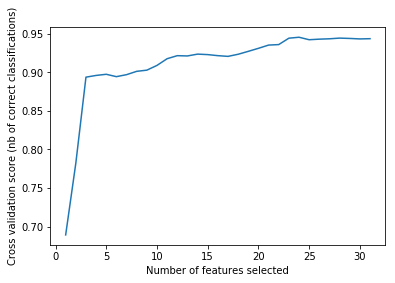

In [40]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### The difference in roc_auc score after a certain point is less than 0.5, we can choose fewer features and have roughly the same classfication power.

In [41]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE

In [62]:
new = RFE(clf,n_features_to_select=10)

In [63]:
new.fit(exams.drop(columns="Tipo"),exams["Tipo"]);

## Selected features

In [199]:
list(exams.drop(columns="Tipo").columns[new.support_])

['A1 Time [ms]',
 'HC Time [ms]',
 'A1 Deflection Length [mm]',
 'A2 Deflection Amp. [mm]',
 'A1 Deflection Area [mm²]',
 'HC Deflection Area [mm²]',
 'A2 Deflection Area [mm²]',
 'dArcLengthMax [mm]',
 'DA Ratio Max (2mm)',
 'DA Ratio Max (1mm)']

## Selected estimator

- It is already fit to the reduced dataset, so we can save this and simply use it later

In [200]:
new.estimator_

LogisticRegression(C=7.75, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [203]:
import pickle

In [208]:
with open("LogReg.pickle","wb") as f:
    pickle.dump(new.estimator_,f)

## After reducing the dataset, we can save that and use it at the application

In [212]:
reduced = pd.DataFrame(new.transform(exams.drop(columns="Tipo")),columns=exams.drop(columns="Tipo").columns[new.support_],index=exams.index)

In [213]:
reduced["Tipo"] = exams["Tipo"]

In [215]:
reduced.head()

,A1 Time [ms],HC Time [ms],A1 Deflection Length [mm],A2 Deflection Amp. [mm],A1 Deflection Area [mm²],HC Deflection Area [mm²],A2 Deflection Area [mm²],dArcLengthMax [mm],DA Ratio Max (2mm),DA Ratio Max (1mm),Tipo
Last Name:,,,,,,,,,,,
888b1b6c40,6.735,16.170,2.285,0.124,0.160,3.947,0.276,-0.176,5.01591,1.60802,1
ad841a83d0,6.683,16.401,2.281,0.099,0.185,4.055,0.182,-0.155,4.93730,1.64728,1
92f8e531ca,7.098,14.322,2.016,0.098,0.144,4.495,0.201,-0.149,4.68514,1.61234,1
98c72a3c3a,7.178,15.015,2.119,0.093,0.130,4.024,0.165,-0.134,3.94538,1.50617,1
a6afcfb47e,6.946,15.939,2.142,0.089,0.168,3.000,0.195,-0.114,5.37244,1.74682,1


In [216]:
reduced.to_csv("reducedExams.csv")